## 1.4.10 Histogram in OpenCV

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [7]:
img = cv2.imread('beach.jpg',0)
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [9]:
hist.size

256

In [10]:
hist

array([[0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [0.0000e+00],
       [2.0000e+00],
       [1.0000e+00],
       [1.0000e+00],
       [1.0000e+00],
       [2.0000e+00],
       [2.0000e+00],
       [3.0000e+00],
       [4.0000e+00],
       [3.0000e+00],
       [2.0000e+00],
       [1.0000e+01],
       [1.4000e+01],
       [1.4000e+01],
       [3.1000e+01],
       [2.9000e+01],
       [2.8000e+01],
       [4.9000e+01],
       [8.2000e+01],
       [9.4000e+01],
       [1.0800e+02],
       [1.6100e+02],
       [2.1300e+02],
       [2.5800e+02],
       [3.6700e+02],
       [5.1300e+02],
       [6.3200e+02],
       [7.7100e+02],
       [9.3500e+02],
       [1.0190e+03],
       [1.0400e+03],
       [1.1180e+03],
       [1.2350e+03],
       [1.2680e+03],
       [1.4940e+03],
       [1.5310e+03],
       [1.6760e+03],
       [1.8820e+03],
       [2.1330e+03],
       [2.4810e+03],
       [2.8740e+03],
       [3.5820e+03],
       [4.0650e+03],
       [4.6280e+03],
       [5.156

In [11]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

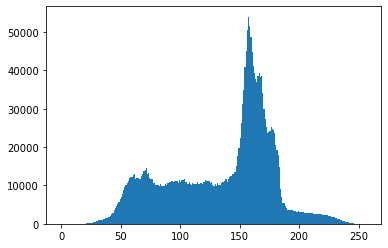

In [12]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

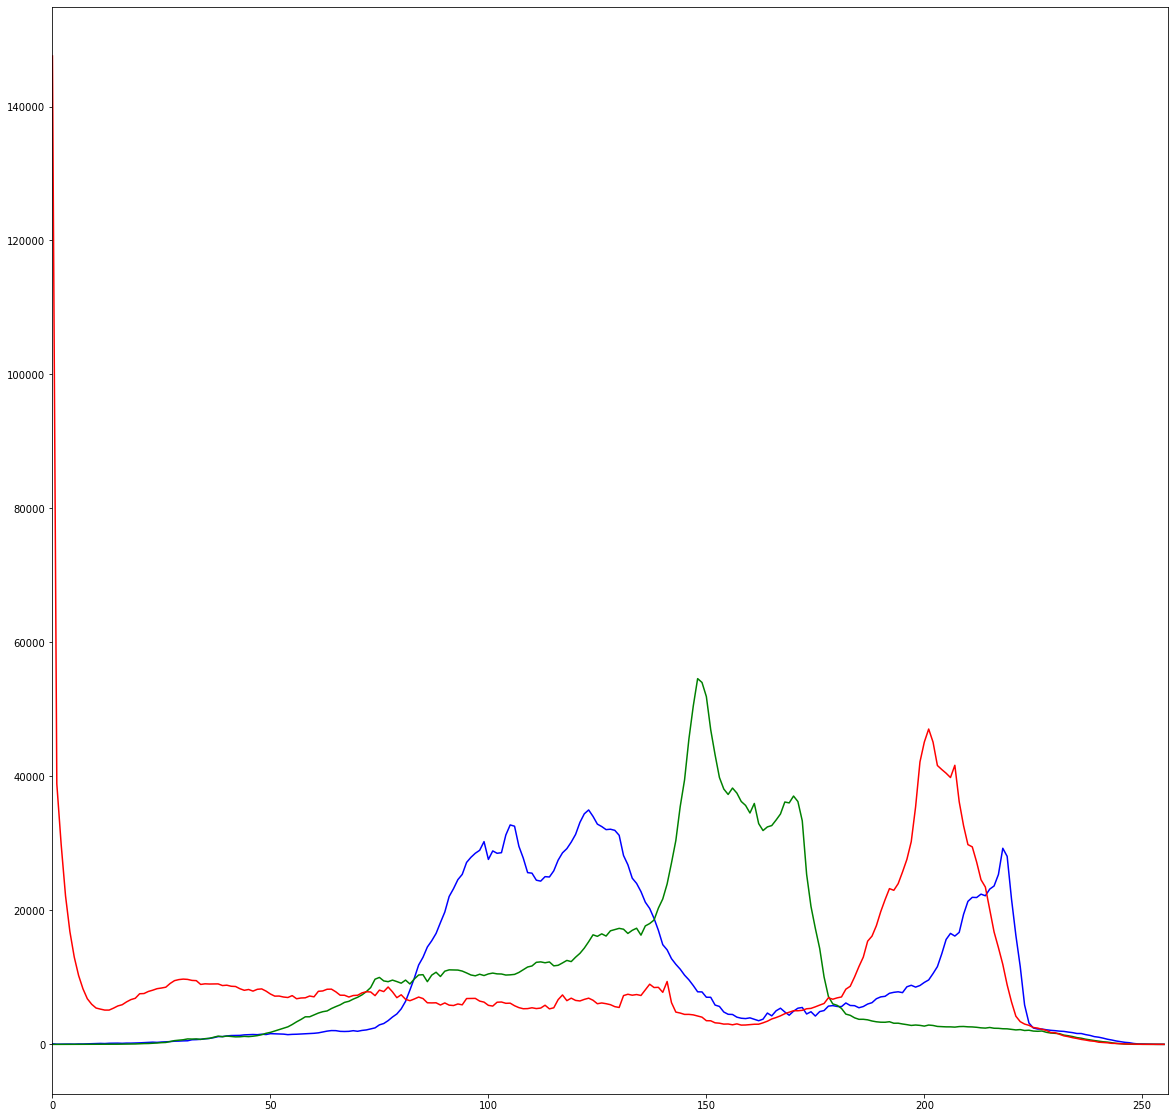

In [13]:
img = cv2.imread('beach.jpg')
color = ('b','g','r')
plt.figure(figsize=(20,20))
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [22]:
img.shape

(1280, 1920)

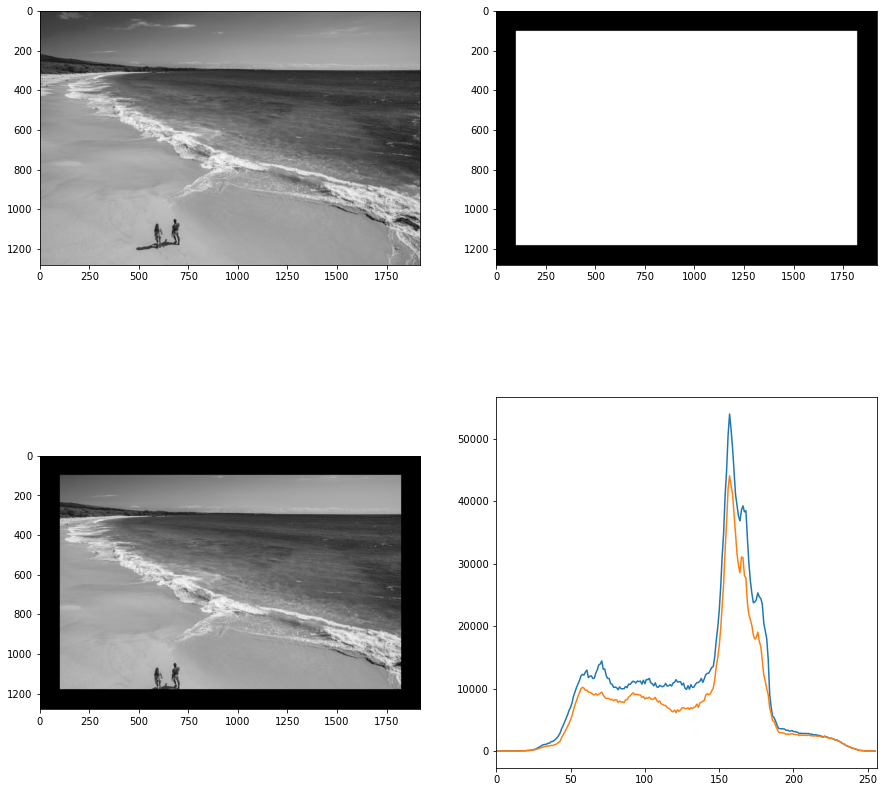

In [23]:
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:1180, 100:1820] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.figure(figsize=(15,15))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)

plt.xlim([0,256])
plt.show()

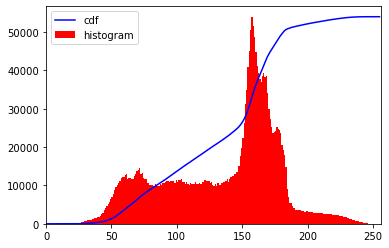

In [24]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [25]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [27]:
img2 = cdf[img]

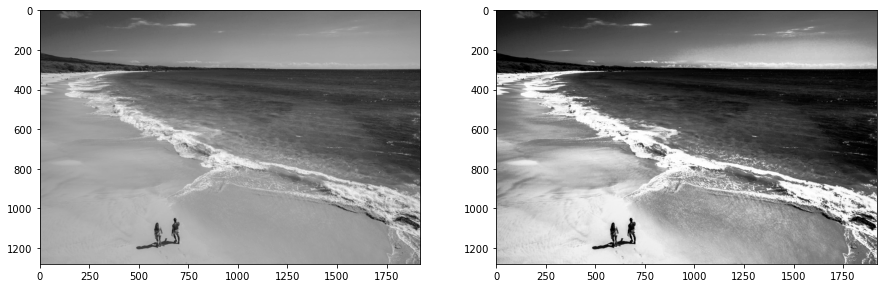

In [28]:
plt.figure(figsize=(15,20))
plt.subplot(121), plt.imshow(img, 'gray')
plt.subplot(122), plt.imshow(img2,'gray')
plt.show()

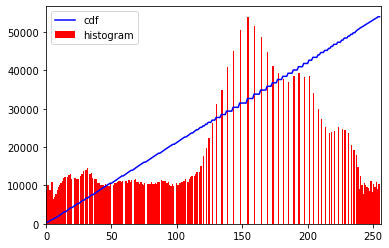

In [29]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

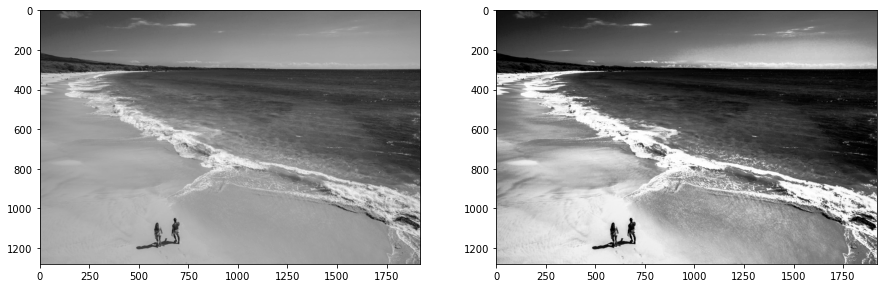

In [34]:
img = cv2.imread('beach.jpg',0)
equ = cv2.equalizeHist(img)
plt.figure(figsize=(15,20))
plt.subplot(121), plt.imshow(img, 'gray')
plt.subplot(122), plt.imshow(img2,'gray')
plt.show()

In [37]:
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)
cv2.imshow('image', res)
cv2.waitKey(0)
cv2.destroyAllWindows()